In [ ]:
import zipfile


def filter_images(embedded_file: str) -> bool:
    embedded_file = embedded_file.lower()
    is_image = any(
        (
            embedded_file.endswith(".png"),
            embedded_file.endswith(".jpg"),
            embedded_file.endswith(".jpeg"),
        )
    )
    return is_image


file_path = "example.xlsx"
save_path = "example.png"

zip_file = zipfile.ZipFile(file_path)
image_files = filter(filter_images, zip_file.namelist())
opened_files = [zip_file.read(image) for image in image_files]

opened_files

[b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00o\x00\x00\x00O\x08\x06\x00\x00\x00\xe5i\x9bV\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x0e\xc3\x00\x00\x0e\xc3\x01\xc7o\xa8d\x00\x00\x01\xe5IDATx^\xed\xdd1n\xc2@\x10\x85\xe1\x1c#\xe2\xa4\xe1:\xa1\x0f\xbd{_\x82\x9a\x96\x96\xd6h0\x05\xf1lf\x07\xeb\x99x\xe5\xff\x97^\x87\x17\xec/\rR\x94|\x0c\xd4l\xe05\x1cx\r\x07^\xc3\x81\xd7p\xe05\x1cx\r7\x1b\xaf\xef\xfba\xbf\xff\x92\xcc\xce\xaau>\x9f\x8b\xd7.9{\xcfZ\xca\xe7p8|?N\xcd5\x1b\xefx\xfc\x19v\xbbO\xc9\xec\xacZ\xa7\xd3\xa9x\xed\x92\xb3\xf7\xac\xa5|\x0e\x06\xf8J\xe0\x05\x03/1\xf0\xc6\x81\'\x1cx\x89\x817\x0e<\xe1\xc0K\x0c\xbcq\xab\xc3S\x95\xc5\xcb\xfc d?\xbb\x12/s\xd6\xab\x81\x17\x0c<Q\xe0\xf9\xc0\x0b\x06\x9e(\xf0|\xe0\x05\x03O\x14x>\xf0\x82\x81\'\n<\x1fx\xc1\xc0\x13\x05\x9e\x0f\xbc`\xe0\x89\x02\xcf\x07^0\xf0D\x81\xe7\x03/\x18x\xa2\xc0\xf3\x81\x17\x0c<Q\xe0\xf9\xc0\x0b\x06\x9e(\xf0|\x8b\xe3\xd9\xebj\xcb\xdcX\x16\xcf~\x03\xab\xf4

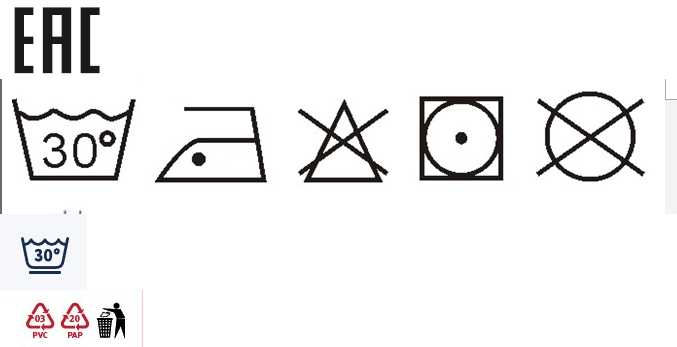

In [ ]:
import io
from PIL import Image


save_path = "example.jpg"
background_color = (255, 255, 255)

images = [Image.open(io.BytesIO(image_data)) for image_data in opened_files]
widths, heights = zip(*(image.size for image in images))
total_height = sum(heights)
max_width = max(widths)

save_image = Image.new("RGB", (max_width, total_height), background_color)

y_offset = 0
for image in images:
    save_image.paste(image, (0, y_offset))
    y_offset += image.height

save_image.save(save_path)
save_image